# Stocks anlysis

## Objective

* To use pandas to load the latest updated data from Yahoo Finance
* To explore and understand the dataset 
    * Viewing the data
    * Correlation Analysis
    * Graphing using matplotlib
* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)
* Comparing models and discuss improvements
* Challenges:
    * Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
    * Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
    * Cleaning out the data
    * Importing data files

## Loading YahooFinance Dataset

In this demonstration, we will use pandas web data reader. This is an extension of pandas library to communicate with most updated financial data. 

This will include sources as:
* Yahoo! Finance
* Google Finance
* Enigma
* FRED
* Fama/French
* World Bank
* OECD
* Eurostat
* EDGAR Index
* TSP Fund Data
* Oanda currency historical rate
* Nasdaq Trader Symbol Definitions

In [124]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-01,127.930000,122.790001,123.750000,127.790001,115998300.0,127.790001
2021-03-02,128.720001,125.010002,128.410004,125.120003,102015300.0,125.120003
2021-03-03,125.709999,121.839996,124.809998,122.059998,112430400.0,122.059998
2021-03-04,123.599998,118.620003,121.750000,120.129997,177275300.0,120.129997
2021-03-05,121.934998,117.570000,120.980003,121.419998,150621101.0,121.419998


In [125]:
df.shape

(1554, 6)

## Exploring the data 

First we will need to explore the data.
This means understanding the stocks data trend thoroughly by finding key measures
* rolling mean (moving average) -- to determine trend
* return deviation -- to determine return deviation

In [126]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

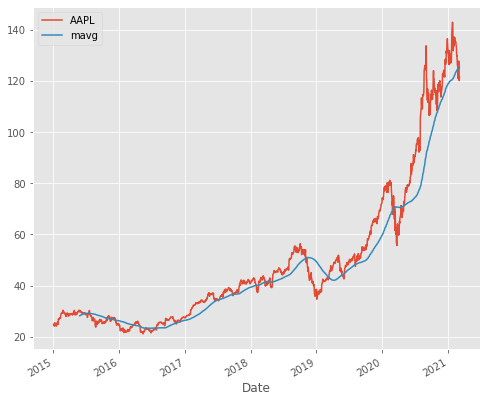

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

Returns defined as:  (the ratio between two consecutive days)
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [128]:
rets = close_px / close_px.shift(1) - 1
rets.head()

# close_px.pct_change().head()

Date
2015-01-02         NaN
2015-01-05   -0.028172
2015-01-06    0.000094
2015-01-07    0.014022
2015-01-08    0.038422
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

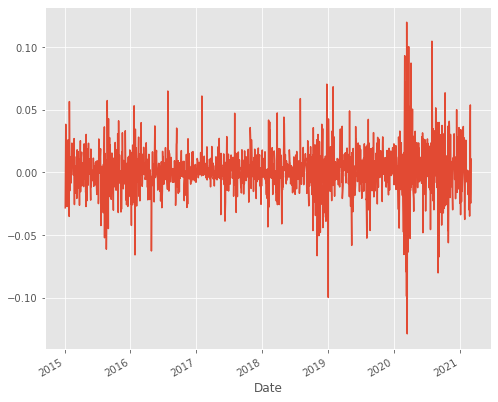

In [129]:
rets.plot(label='return')

## Doing the competitor analysis/Correlation

1. How does one company perform in relative with its competitor
2. What are the correlations among these companies

In [130]:
tickers = [
    'ABBV',
    'AAL',
    'BIDU',
    'BILI',
    'BA',
    'FSLY',
    'FUBO',
    'NIO',
    'NVDA',
    'OPEN',
    'PLTR',
    'PYPL',
    'SE',
    'SNAP',
    'SNOW',
    'SQ',
    'TSM',
    'TSLA',
    'XPEV',
    'ZM',
    'BABA',
    'PDD',
    'AAPL'
    
]

In [131]:
dfcomp = web.DataReader(tickers,'yahoo',
                               start=start, 
                               end=end)['Adj Close']
dfcomp.tail()

Symbols,ABBV,AAL,BIDU,BILI,BA,FSLY,FUBO,NIO,NVDA,OPEN,...,SNAP,SNOW,SQ,TSM,TSLA,XPEV,ZM,BABA,PDD,AAPL
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-01,108.410004,21.180000,295.579987,144.669998,224.389999,77.250000,38.779999,49.759998,553.669983,30.219999,...,66.669998,272.170013,241.000000,129.130005,718.429993,35.500000,409.660004,241.690002,186.149994,127.790001
2021-03-02,107.849998,21.440001,301.929993,137.940002,223.139999,70.900002,41.889999,43.290001,536.250000,31.330000,...,64.510002,270.600006,252.199997,126.000000,686.440002,31.500000,372.790009,234.419998,175.520004,125.120003
2021-03-03,106.709999,22.170000,277.799988,138.779999,228.559998,68.010002,34.139999,41.529999,512.190002,28.850000,...,60.020000,247.029999,234.199997,122.889999,653.200012,30.030001,341.570007,236.270004,168.750000,122.059998
2021-03-04,105.650002,21.240000,260.589996,126.660004,224.710007,65.489998,32.110001,39.279999,494.809998,24.385000,...,57.709999,249.000000,218.410004,115.589996,621.440002,29.360001,343.089996,230.500000,158.399994,120.129997
2021-03-05,106.699997,20.450001,261.720001,118.839996,223.220001,64.839996,29.959999,38.110001,498.459991,21.990000,...,57.430000,239.729996,216.440002,120.800003,597.950012,28.030001,337.429993,233.889999,156.820007,121.419998


Get the dimension of dataframes

In [132]:
# retscomp

In [133]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols,ABBV,AAL,BIDU,BILI,BA,FSLY,FUBO,NIO,NVDA,OPEN,...,SNAP,SNOW,SQ,TSM,TSLA,XPEV,ZM,BABA,PDD,AAPL
Symbols,,,,,,,,,,,,,,,,,,,,,
ABBV,1.000000,0.204552,0.256403,0.165856,0.295013,0.188722,0.009697,0.134062,0.301585,0.042260,...,0.184979,0.099426,0.257433,0.290465,0.216194,0.171211,-0.026936,0.288763,0.186130,0.339232
AAL,0.204552,1.000000,0.259049,0.164957,0.542476,-0.024842,0.032992,0.185583,0.235567,0.005604,...,0.107873,0.074888,0.248825,0.286921,0.205729,0.113062,-0.177935,0.260221,0.103360,0.269861
BIDU,0.256403,0.259049,1.000000,0.379053,0.321813,0.231072,0.049759,0.251608,0.362950,0.150218,...,0.185597,0.107593,0.372216,0.396384,0.313530,0.210289,0.111717,0.518778,0.295060,0.401078
BILI,0.165856,0.164957,0.379053,1.000000,0.206928,0.247428,0.054884,0.207199,0.351176,0.247161,...,0.237555,0.280255,0.391950,0.335584,0.258714,0.298136,0.219927,0.443772,0.423859,0.327657
BA,0.295013,0.542476,0.321813,0.206928,1.000000,0.138874,0.073706,0.185561,0.317394,0.129989,...,0.186640,0.130117,0.381484,0.370567,0.285106,0.212627,-0.051620,0.291761,0.128151,0.414584
FSLY,0.188722,-0.024842,0.231072,0.247428,0.138874,1.000000,0.066755,0.134259,0.397267,0.187854,...,0.252683,0.290368,0.375347,0.247836,0.279551,0.273191,0.291556,0.268942,0.235635,0.330569
FUBO,0.009697,0.032992,0.049759,0.054884,0.073706,0.066755,1.000000,-0.027895,0.059131,0.105422,...,0.042064,0.185076,0.092567,0.062524,-0.011828,0.163508,0.035392,0.083983,-0.061285,0.095737
NIO,0.134062,0.185583,0.251608,0.207199,0.185561,0.134259,-0.027895,1.000000,0.215623,0.182437,...,0.142628,0.174088,0.193402,0.212524,0.253810,0.642698,0.143082,0.292232,0.289999,0.234518
NVDA,0.301585,0.235567,0.362950,0.351176,0.317394,0.397267,0.059131,0.215623,1.000000,0.311656,...,0.322298,0.332541,0.500124,0.528598,0.356561,0.334019,0.193076,0.445138,0.305961,0.539749


In [134]:
# plt.scatter(retscomp.AAPL, retscomp.GE)
# plt.xlabel('Returns AAPL')
# plt.ylabel('Returns GE')

You can do scatter matrix with all the competitors data and find the kde of each m
KDE will determine if your chart is more normally distributed leaning to the 
* left: Returns are more likely to be negative in the long run
* centre: Returns are more likely to be 0 in the long run
* right: Returns are more likely to be positive in the long run

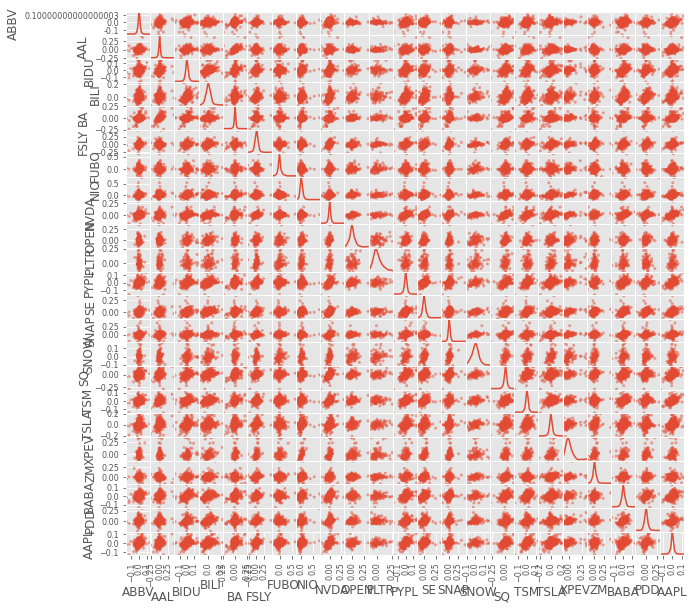

In [135]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

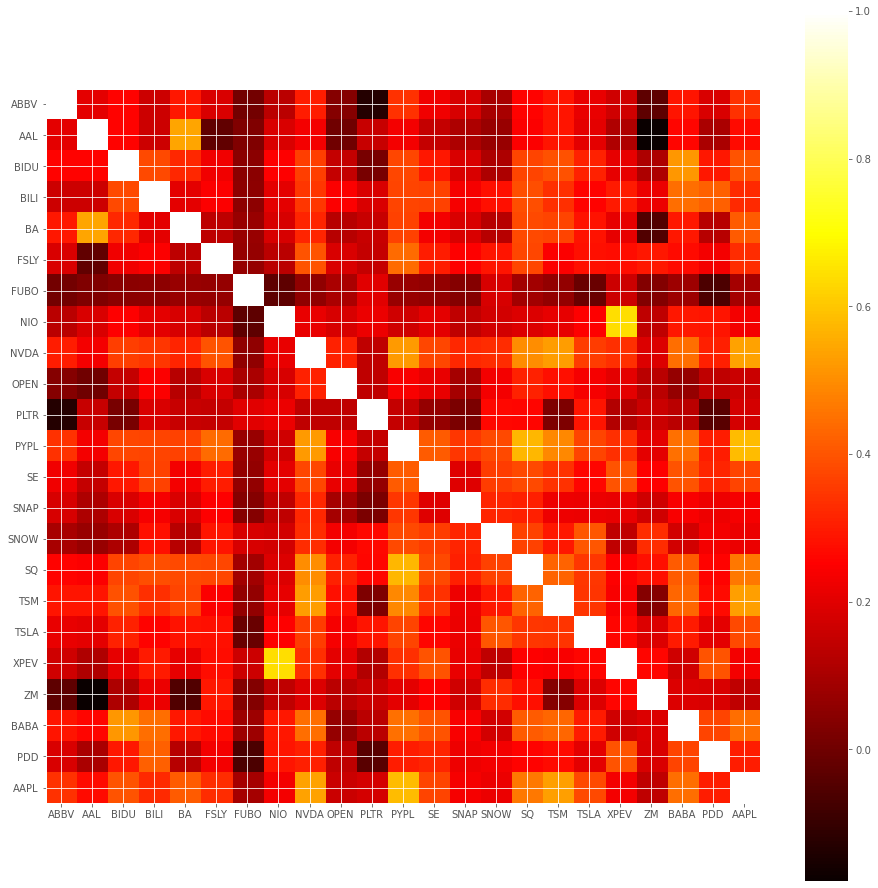

In [136]:
fig, ax = plt.subplots(figsize = (16,16))
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

## Stocks mean and Risk calculation
Which stocks are risky and bearing returns

Kurtosis and skewness

In [141]:
retscomp

Symbols,ABBV,AAL,BIDU,BILI,BA,FSLY,FUBO,NIO,NVDA,OPEN,...,SNAP,SNOW,SQ,TSM,TSLA,XPEV,ZM,BABA,PDD,AAPL
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.018819,-0.000557,-0.014748,NaN,-0.006926,NaN,NaN,NaN,-0.016890,NaN,...,NaN,NaN,NaN,-0.024237,-0.042041,NaN,NaN,-0.025097,NaN,-0.028172
2015-01-06,-0.004950,-0.015590,0.001774,NaN,-0.011778,NaN,NaN,NaN,-0.030318,NaN,...,NaN,NaN,NaN,-0.017479,0.005664,NaN,NaN,0.022970,NaN,0.000094
2015-01-07,0.040416,-0.000566,0.018939,NaN,0.015526,NaN,NaN,NaN,-0.002606,NaN,...,NaN,NaN,NaN,0.014513,-0.001562,NaN,NaN,-0.011518,NaN,0.014022
2015-01-08,0.010459,0.012262,0.021663,NaN,0.017682,NaN,NaN,NaN,0.037617,NaN,...,NaN,NaN,NaN,0.006461,-0.001564,NaN,NaN,0.028395,NaN,0.038422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,0.006219,0.011461,0.042757,0.148448,0.058393,0.049878,0.098584,0.086938,0.009278,0.078515,...,0.015382,0.048663,0.047689,0.025330,0.063553,0.040750,0.096491,0.016529,0.087579,0.053851
2021-03-02,-0.005166,0.012276,0.021483,-0.046520,-0.005571,-0.082201,0.080196,-0.130024,-0.031463,0.036731,...,-0.032398,-0.005768,0.046473,-0.024239,-0.044528,-0.112676,-0.090001,-0.030080,-0.057104,-0.020894
2021-03-03,-0.010570,0.034048,-0.079919,0.006090,0.024290,-0.040762,-0.185008,-0.040656,-0.044867,-0.079157,...,-0.069602,-0.087103,-0.071372,-0.024683,-0.048424,-0.046667,-0.083747,0.007892,-0.038571,-0.024457


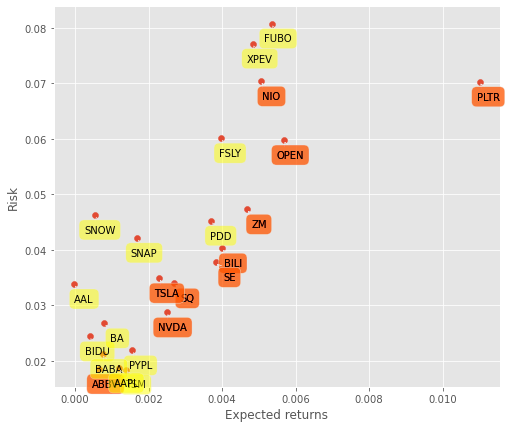

In [137]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')


tickers_to_keep = ['PLTR', 'OPEN', 'ZM', 'BILI', 'SE', 'TSLA', 'NIO', 'SQ', 'NVDA', 'ABBV']

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
    if label in tickers_to_keep:
        plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'red', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

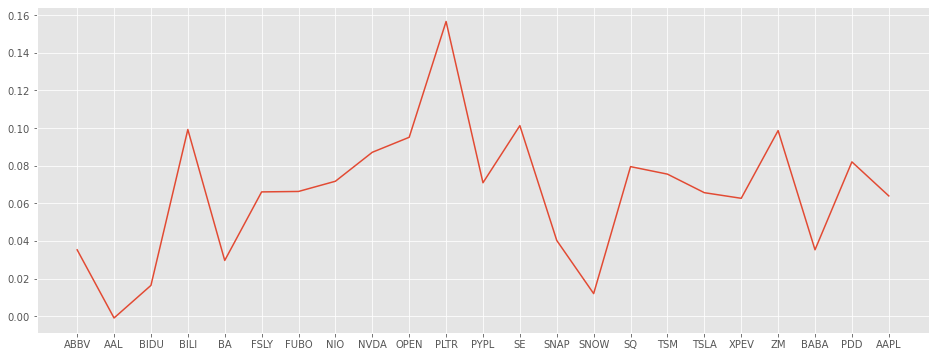

In [138]:
fig, axes = plt.subplots(figsize = (16,6))
plt.plot(retscomp.mean()/retscomp.std())

# Predicting the stocks price

To predict the return of the stocks in the next period - Prediction analysis
* Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

But first, let us extract the necessary columns first from df:
* Adj Close
* Adj Volume
* HL Percentage
* PCT Change

In [139]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2015-01-02,24.861401,212818400.0,3.740971,-1.849356
2015-01-05,24.161013,257142000.0,3.049410,-1.883831
2015-01-06,24.163294,263188400.0,2.635049,-0.262811
2015-01-07,24.502111,160423600.0,1.392111,0.513063
2015-01-08,25.443539,237458000.0,3.083390,2.435225


In [152]:
import math
import numpy as np
# from sklearn import preprocessing, cross_validation, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(1554, 5)
Dimension of X (1538, 4)
Dimension of y (1538,)


In [154]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Generation

* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)

## Build the model

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

## Test the model

In [156]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.971322464941736
The quadratic regression 2 confidence is  0.9727097118268248
The quadratic regression 3 confidence is  0.9752504557052293
The knn regression confidence is  0.9467022466578118


This means that the linear regression holds the most accuracy of it as being linear and justify the trend of stocks as being linear most of the times. 

However this does not mean we can just put stocks in it. There are still many issues to consider, especially with different companies that have different price trajectories over time. Google really is very linear: Up and to the right. Many companies aren't, so keep this in mind. 

We need to plot out the graph to make the most sense of it 

In [158]:
# Printing the forecast
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidence, forecast_out)

NameError: name 'confidence' is not defined

# Plotting the Prediction

In [159]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

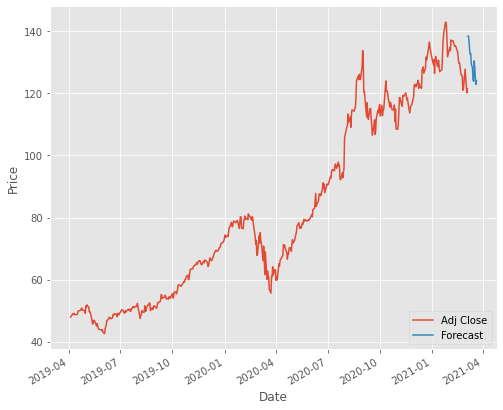

In [160]:
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Challenges (To Be Continued):
* Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
* Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
* Cleaning out the data
* Importing data files